In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

pd.set_option('max_column', 100)

In [2]:
raw_path = '../../datasets/raw/'
mst_path = '../../datasets/mst/'
fig_path = '../../exports/01_summary_stats_ebike/'

In [3]:
os.listdir(mst_path)

['question_lookup.csv', 'StudentSurveyEnglish.csv']

In [26]:
#load in clean data
df = pd.read_csv(mst_path+"StudentSurveyEnglish.csv")
df.head()


,respondent_id,collector_id,custom_data_1,response,other_(please_specify),walking,car,bus,metro_rail_(train),bike,scooter,other_(please_specify).1,parent/grandparent,neighbor,friend/s,came_alone,other_(please_specify).2,fun,healthy,good_for_me,scary,tiring,takes_too_long,"""stop,_look,_listen""","""always_wear_a_helmet""","""left,_right_left_again""","""scan,_signal,_scan"""
0,6.950670e+09,173176001.0,False,5,False,False,False,True,False,False,False,False,False,False,False,False,X,False,False,True,False,False,False,True,True,True,False
1,6.950669e+09,173176001.0,False,5,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False
2,6.950669e+09,173176001.0,False,5,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False
3,6.950669e+09,173176001.0,False,5,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False
4,6.950669e+09,173176001.0,False,5,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False


In [5]:
lookup = pd.read_csv(mst_path+"question_lookup.csv")
lookup

,ans_choice,question
0,Response,What grade are you in?
1,Other (please specify),What grade are you in?
2,Walking,How did you got to school this morning? (Check...
3,Car,How did you got to school this morning? (Check...
4,Bus,How did you got to school this morning? (Check...
5,Metro Rail (train),How did you got to school this morning? (Check...
6,Bike,How did you got to school this morning? (Check...
7,Scooter,How did you got to school this morning? (Check...
8,Other (please specify),How did you got to school this morning? (Check...
9,Parent/Grandparent,Who brought you to school this morning? (Check...


In [6]:
headings = list(df.columns.values)
questions = lookup.question.unique()
questions

array(['What grade are you in?',
       'How did you got to school this morning? (Check all that apply)',
       'Who brought you to school this morning? (Check all that apply)',
       'Do you think walking and biking to school is? (Check all that apply',
       'Have you ever heard of the following? (Check all that apply)'],
      dtype=object)

In [32]:
#nothing interesting in 'other' for q1
df['other_(please_specify).1'] = df['other_(please_specify).1'].str.lower()
df['other_(please_specify).1'].unique()
df['other_(please_specify).1']
df['other_(please_specify).1'] = np.where(df['other_(please_specify).1']== "false", False, True)


In [34]:
#nothing interesting in 'other' for q2
df['other_(please_specify).2'] = df['other_(please_specify).2'].str.lower()
df['other_(please_specify).2'].unique() 
df['other_(please_specify).2'] = np.where(df['other_(please_specify).2']== "false", False, True)


In [62]:
totals = df.sum().to_frame()
totals[0] = totals[0].replace(True, 1)
totals[0] = totals[0].replace(False, 0)

totals.index.name = 'Response'
totals.reset_index(inplace=True)
totals.columns = ['Response', 'Number']

totals['Response'] = [s.split('(', 1)[0].replace('_', ' ') for s in totals['Response']]


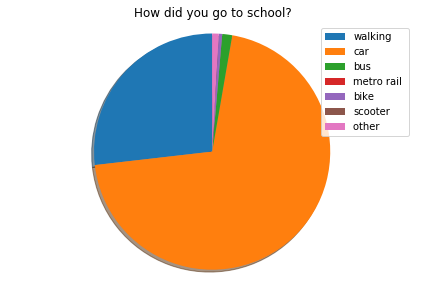

In [68]:
transportation_mode = totals.iloc[5:12]

patches, texts = plt.pie(transportation_mode['Number'], shadow=True, startangle=90)
plt.legend(patches, transportation_mode['Response'], loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('How did you go to school?')
plt.show()

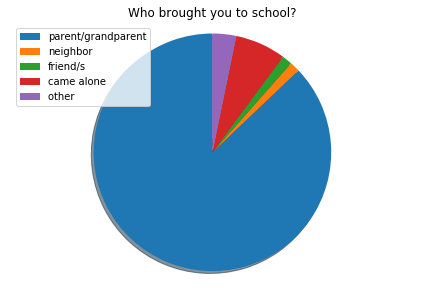

,Response,Number
12,parent/grandparent,189
13,neighbor,3
14,friend/s,3
15,came alone,15
16,other,7


In [69]:
who_brought_you = totals.iloc[12:17]

patches, texts = plt.pie(who_brought_you['Number'], shadow=True, startangle=90)
plt.legend(patches, who_brought_you['Response'], loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('Who brought you to school?')
plt.show()

who_brought_you

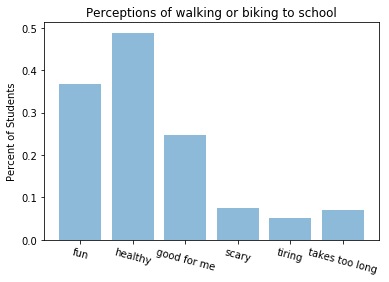

In [90]:
num_responses = len(df.index)

walking_biking_perceptions = totals.iloc[17:23]

objects = walking_biking_perceptions['Response']
y_pos = np.arange(len(objects))
percent_students = walking_biking_perceptions['Number']/num_responses

plt.bar(y_pos, percent_students, align='center', alpha=0.5)
plt.xticks(y_pos, objects,rotation = -15)
plt.ylabel('Percent of Students')
plt.title('Perceptions of walking or biking to school')
 
plt.show()

In [86]:
len(df.index)


215

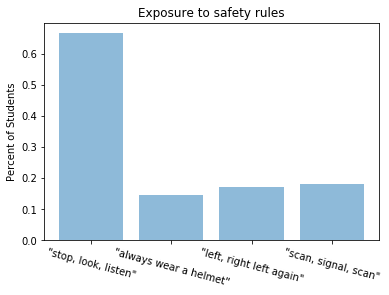

In [91]:
safety_exposure = totals.iloc[23:27]

objects = safety_exposure['Response']
y_pos = np.arange(len(objects))
percent_students = safety_exposure['Number']/num_responses

plt.bar(y_pos, percent_students, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation = -15)
plt.ylabel('Percent of Students')
plt.title('Exposure to safety rules')
 
plt.show()

In [92]:
totals

,Response,Number
0,respondent id,1.47322e+12
1,collector id,3.72328e+10
2,custom data 1,0
3,response,5555555555555555545555555555554455555445544444...
4,other,FalseFalseFalseFalseFalseFalseFalseFalseFalseF...
5,walking,59
6,car,155
7,bus,3
8,metro rail,0
9,bike,1
